Algoritmos

In [4]:
#to do
def Naive(T,S):
    N = len(T)
    M = len(S)
    for i in range(N - M + 1):
        j = 0
        while j < M:
            #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
            if (T[i + j] != S[j]): 
                break
            j += 1
        if j == M:
            return True
    return False


#to do
def KMP(T,S):
  M = len(S)
  N = len(T)
  j = 0
  i = 0
  def create_table(S):
      table = [0]*M
      t = 0
      k = 1
      while k < M:
        if S[t] == S[k]:
          table[k] = t+1
          t += 1
          k += 1
        elif t == 0:
            table[k] = 0
            k += 1
        else:
            t = table[t-1]
      return table
  table = create_table(S)
  while i < N:
    if S[j] == T[i]:
      i += 1
      j += 1
    if j == M:
      j = table[j-1]
      return True
    elif i < N and S[j] != T[i]:
      if j != 0:
        j = table[j-1]
      else:
        i += 1
  return False

#to do
def BMH(T, S):
    M = len(S)
    N = len(T)
    def create_table(S):
        table = dict(zip(sorted(S), [M]*N))
        tableList = list(table.keys())
        for i in range(M-1):
            c = S[i]
            #print('i:',i,'c:',c,'S[',i,']:',S[i],'index(c):',tableList.index(c),'len(tableList)-1',len(tableList)-1)
            #print(i,M-1,S,S[i])
            if i == M-1 and c not in S[0:-1]:
                table[c] = M
            else:
                if tableList.index(c) < len(tableList):
                    table[c] = M-i-1
                else:
                    table[c] = M
        return table
    table = create_table(S)
    i = 0
    while i <= N:
        if M-1+i <=N and S[-1] == T[M-1+i]:
            match = 0
            for j in range(M-1,-1,-1):
              if S[j] == T[j+i]:
                  match +=1
              else:
                  if T[j+i] not in S:
                    i += M
                  else:
                    i += table[T[j+i]]
                  break
              if match == M:
                  return True
        else:
            if M-1+i <=N and T[M-1+i] not in S:
                i += M
            else:
                if M-1+i <=N and M+i+table[T[M-1+i]] <= N:
                    i += table[T[M-1+i]]
                else:
                    if M+i >= N:
                        i +=1
                    else:
                        return False
    return False

In [ ]:
#to do
def Naive(T,S):
    N = len(T)
    M = len(S)
    for i in range(N - M + 1):
        j = 0
        while j < M:
            #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
            if (T[i + j] != S[j]): 
                break
            j += 1
        if j == M:
            return True
    return False

#to do
def KMP(T,S):
  M = len(S)
  N = len(T)
  j = 0
  i = 0
  def create_table(S):
      table = [0]*M
      t = 0
      k = 1
      while k < M:
        if S[t] == S[k]:
          table[k] = t+1
          t += 1
          k += 1
        elif t == 0:
            table[k] = 0
            k += 1
        else:
            t = table[t-1]
      return table
  table = create_table(S)
  while i < N:
    #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
    if S[j] == T[i]:
      i += 1
      j += 1
    if j == M:
      j = table[j-1]
      return True
    elif i < N and S[j] != T[i]:
      if j != 0:
        j = table[j-1]
      else:
        i += 1
  return False


#to do 2 - usar este
def BMH_entregue(T, S):
    M = len(S)
    N = len(T)
    def create_table(S):
        table = dict(zip(sorted(S), [M]*N))
        tableList = list(table.keys())
        for i in range(M-1):
            c = S[i]
            #print('i:',i,'c:',c,'S[',i,']:',S[i],'index(c):',tableList.index(c),'len(tableList)-1',len(tableList)-1)
            #print(i,M-1,S,S[i])
            if i == M-1 and c not in S[0:-1]:
                table[c] = M
            else:
                if tableList.index(c) < len(tableList):
                    table[c] = M-i-1
                else:
                    table[c] = M
        return table
    table = create_table(S)
    print(table)
    i = 0
    j = M-1
    while i <= N:
        #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
        #print(M-1+i)
        if M-1+i <=N and S[-1] == T[M-1+i]: # adicionado  M-1+i <=N and
            match = 0
            for j in range(M-1,-1,-1):
              if S[j] == T[j+i]:
                  match +=1
              else:
                  if T[j+i] not in S:
                    i += M
                  else:
                    i += table[T[j+i]]
                  break
              if match == M:
                  return True
        else:
            if M-1+i <=N and T[M-1+i] not in S:  # adicionado  M-1+i <=N and
                i += M
            else:
                if M-1+i <=N and M+i+table[T[M-1+i]] <= N:  # adicionado  M-1+i <=N and
                    i += table[T[M-1+i]]
                else:
                    if M+i >= N:
                        i +=1
                    else:
                        return False
    return False
 

#to do
def BMH(T, S):
    M = len(S)
    N = len(T)
    def create_table(S):
        table = dict(zip(sorted(S), [M]*N))
        tableList = list(table.keys())
        for i in range(M-1):
            c = S[i]
            if i == M-1 and c not in S[0:-1]:
                table[c] = M
            else:
                if tableList.index(c) < len(tableList):
                    table[c] = M-i-1
                else:
                    table[c] = M
        return table
    table = create_table(S)
    i = M-1
    while i <= N:
        if S[-1] == T[i]:
            match = 0
            z = 0
            for j in range(M-1,-1,-1):
              if S[j] == T[i-z]:
                  match +=1
              else:
                  if T[i-z] not in S:
                    i += M
                  else:
                    i += table[T[i-z]]
                  break
              if match == M:
                  return True
              z +=1
        else:
            if M-1+i <N and T[M-1+i] not in S:
                i += M
            else:
                if M-1+i <N and M+i+table[T[M-1+i]] <= N:
                    i += table[T[M-1+i]]
                else:
                    if M+i >= N:
                        i +=1
                    else:
                        return False
    return False


#T="jdhevehdkehghf"
#S="ghf" 


#T = "BCBADBDADBADBDSDE"
#S = "BADBDAD"

T = "wehALAPeJrierbFtlpuLWtyCZXOxEtzcFgMPGzwhNZQWxbhSmuecCwqcUHlKFPvnUDhTQDWxbFdyvyKLfLnkEoMACWUyPhfuwKvhxdshUrpKisvaTWtpuFMZlbHpAGwvQitdtIuDLFEjvgUgcuZLZmiFySSUOVAweexMeBBhXAqCOTOceMBlVeBcVUsvmJeZRnVHXpUSBQzKsMpCACgPrHXSSwJOVFgkaZCisOlJWpNPRqTPBZthvuHGcHCfzQPzdbrVKTqiJjfELsNgRDYXOWkCIbDXuXXeXyVChNPVMsfmwBgLSONYUiRdkJVPDtQjNSFzrIuaPPYjhpWMiAyMoKcrDfnrsWuGWrokDjEvdOUTZKaUarGNbVggbMxhZmnRzxXGqNPtDRqjsnFQDlgTOgXPuTtoXwOnmnFknitIBgjjJvTMqIsbqSoNMDTuIYMSyeMdCrGBsxUyQFCrbKqcnXFXUMymBNpkugVdrtXCJqlqysUFiEZnCoQMXldsKbIsRxpXdOknjOidgaJkVRbczAjHkBFQhikGViCPJhCdNyuAaevuRifMakmphwRZpISJLsOEXeoNoeAbTGyHrtQOFqAfboFuXIcOZXwfINlSstcbgUokhKrCVNVAIiFoytEyZDfUxedvqdpiejiwxnfIHZkaATzUhfRGBAVAjxMvytWrFTSWOWDcXaSxynpWvskWfGdbbwFdFUjxbXPLETSkdtgFuViudSfJPnpfshpNRjYdClyuWJdRpfkyGyLhkxhmmuUzNuTzPUArmwgUZvbVebwZepxuePDWAemuWorOJpcjIMbeORARNqANGZCCVAbvDMCiWdBNBKbCQBTNpOWrANWTwAUyNOGvTDTVXzgASNBparMAyHgqdzdpGEZUgwesnuBkwhkgHPkPehAVBmxivuAtcpfxpqPhszPsnNejXRSeQZuVvJXIQAwnNdLbLphxBYDBoipieoOPZBzqTwkAFeqIspscOMkRTDYDgBeAGpIfZQJGUbMezUiTScsgBqZXOPyeyCmFDjwLeCNHrLHfVraXfivItiHekAPHOCsjACINXSVqsvgIdZnHxQPSeWBwESQMTediosROMmBedqiJlYjrIDYMRHFqQkBhYSRBQHIQWdfCyloKRWKDUeDLAFbONMXsMhmtxGLBQdgUxoHWmPgFIHPIIibtSjDhgwTgeuWoyloMnQgXRnGOvMkCbAJujNQUYvcfNSDtCefUltIcUvmZvHuVkLsiCeLIclLhwSjDaeIPDReedMHAASibBDfjLTLQiiFKCeQPDKZNHkfaEyFjcTHDfLJIhjMrvDgZgybaQRexszJWbVprFyCZBRWuCPtZCZOHfnKafqtGNOHhZAeEsaAFJAsShOUfSNPuKetYshiZJbCjWUclnKhDjymMbPtklsqgnKXkHPztXmtXpJYYclkciRStifEWNNhvNTsbmjqqEYwahVqPRMrrxxHNuUuzYzmbhPmIkadVVSfdRqXhSNfwVrPrQUlhtinJdBTQJTuWDueXAUxxdwgFlnygBGcqNJnqANmGkmmvUCKDPQrFDhhdLkiqJbsKmDDDsDeyuHrnxrXkgXKMsEVBSVhRvxMNQNgcrHMPDOgxvoKYVZmbqbheuDUquiwGPcwVKXvsMzCYiEvRDcPgESTvqpKrEPCjCNPaIeMjWhDGBJCMNyqvZSBbbidioviCMEAAtkhNkjEkWWgwAFspXSGNACnRTpppQORFQzGXHNwMrBgADvdTioLmqpwhoDxguBAHRuLQIshtaulGwYYDJXqdkfdTnCmhWaQFhYfLWAEJNXQLFucRkIsFMjWxLVdbvpnFdKsBkoizrOgukJdBVWAekNXxwkypdOQImTubsQMBHLgQretdFBWwUUxRmuYhjeRWAiBPPyJsFzGgHFmCDTFWKkbyfbemvDgOvDFvWeFeQTrzjvffXyedwKkzgUljxcGFVsecggDwRTadHxqzHTuoLxxjlRtUqozyGtREnjxogIFMulUFcFQyAkXDauKsaXkiFaybcDxODsoqKEpyDjAUmKoXxHnwyiiLrmXsTMhcYJELVnJRTEfVMKjUeUfLFCbWvYBioZdfRorwTLyXsyWyNkhdQBhpVFyaifcSwpavnGpKYaawvUKxECjWIiQVFQkDKwWkUzhwggVxhJWnzBQbqcRHOIncUPqKXsuXuEgiKdYzfZIXiwXkhiMYaaumcfqOcILgrdlGVjPfGjyGmDQqYfsqxxiXVUKRqXnwTqRuvTweEmPDTFiEPmsWeoSHqzoofHidqhqoCEdPzEtmdAGxeGrfOTcXJtxpzwrRjbZAtZVBlOVDhyykeDBXgGvhMovKmvGMXwLtnhojhdHTyQyTpAtHxPFVUjolYyaBxgcngfatPVPDDAhUuCwaqhJPpkyzGwlOFZycnqkLohDUqYfUdHHMHPqJVnKgncwcvhWwLedYkuHkBISOyhNNFHVaOtJLTaSsVscnrwRjWLyCsxaFKdilhpIbZshZCWNWDtZrttxsUVSzPPdsKncBcgVukuBuxnThVECwngFqSUdRlkcTsTyalegSuWrCQnDVwvlVhpMmZFQSxDWBRVmXWFMjxLtmlkxhDccMZOGlQdhlOwUgirEPwzJGrZWEIpBmTyehBDLmwQmUVYhfXQiAbovMWvjtGdcgVVuQIamrylJQKVMZrYeDcwDkHVThMlNtbTgsilqvMJLHtyoEgIMRsulnUnBBNeGQguJeuViNzhpmxoRUsvgcTMaZjugnrWhHoycIVnBSrnrskNJMnNmvHWGDfwXNqThrfxgZZwRUiXUVRQkyydyUjRzvPtyNEoQzqfwGuxJMxsufHDHjoLWtROKJdTxIVPvlOSUEldQbatdIehZYKHbUbMZERdraqRpTIQjjPoCinXCqQhbsYCaeUnjSWcWYRTZOpDxTHnTvxTWVYHrXCuMiuMGxGiCgMugxYvRVVdIJVqYoIiiwCxjcSnRnYfmpVDakMnagwKbfSeRgtUmBjhpLlzxdElARePCZiIDkpPcMlHPtOnFpPymXeAgeSAiuFdzNEjPFFeYVBjpdRyjhOgsrzhNZfhgQeBlTkWVfbITIERxrSdmaccElLZEDmWfzpqfdRBacODEcqTRuXYfjtKxQIJZNRMVGRcYRwpgwwVZyvdQOXqassHwezIvRTTgZonQFivjBctgFUJApTYVyqhjhdHFENFqJIEDhrukDcCLXWgmmFRWCbaCuffOTBwKbwCdAxUUMFlgDtfyeZEepPlJZtHYPFcGgcGxZlySnoDucaGiwMLOmCPEEdUVwBPnQWxCxqHIYljqfzNTmULnebrcVjqTKsMqimVxSvIkTlFJbpyrWTFZyXOIMrlDZtKZbulLxjbbCuzbqyTZcUshCwyYbsRJKcZSGuJKjXgyOaqagDTWoUSIEOXrcHszvYuwgEDHmCIpPJyImlYjdUtfZcxaRzVwrXzZkYZSKDakLYJuOZswBDzGAguHiKZdfETHqjgAaRsPHaWUfJgLytLiomlWzokHKnOpvztpQhoxAAIDOVrjgyynXQumAbzHOjQuVoRCOxhWdLVzUtooxXwLIdeerpmWWWxKqVvWMKmxemVbmMJaCkiWLePUBOloTMbXBoPKkSVuiFvcFQWDZXehtwWbAPVaTkyIiiYbxQrxASEhFqoiRaTqjEptGtJgEGKyxrgrvRLCpMHQmQEJfWoIpTrgtgIYXIFOkjMZUQbAZuBjTrMkECkdsYbfROHUjMxlRpVYNWfPoNhDiIICgLWHSmAnnmeAsSzLYyYsPBpkKZzgBwMqRHjFyVEuEODZBjYwWBeHkBrGDKUZzJDcCKtaqDiqkSMKmtEPiizgRRmxrtFswESvTwTuhiYalQogySSYbCtErwibDCKqpkqVvlXAXIeObkYAFEtfyLYOwcOJOeEYHWfKKKZhpTjzdvaAIoCDoVJZlBmdjSVQBwlnsTdwpXGDmRboEQTSCiQhnNeOgfhnnigHNwiZuUTsOPcxoWuPeVYYGpQRMWUverQQdGwtFvWtreleLRGKFOQTjdEsZVJBuOyCNIkraxapJYvWnXMOdQnKkSSmCpWNhvHdUcZQzBlvMNDQpjFpMDNfuRehazOYqhKTRhNactFzoSymDKJoYUlscihtHONQZuUDDXdVGhUjNigUnnaDkMjphCRxYVgPgVnvrjIEGsfuteTqpbkCpXbflCPnfxEDPhVERlUkfwceTdLYeczDsVNYygdsdYZTstdkHcogXvdUKPrIgrUGFmozzfkRMEMMacCiagEPZserFbyolORdGnjMidHmegoiPJoUnzoDwjhZPEDPVCARiYBsHXDZgYiEfDSKhZzdlEaUNMqxyXepeKlowJUDuhEBwAbRUUOXsyEsKmzxpHvFbiuMfaPmqWiUTyXFeWOFTxoCPrXydAhwlfvGrsCcBAxUwrBDUKwxpzTqssfRatHbTpaawHeeiBoKDqUAcKhZIhrlawSMDcfmLAqoGZuFmsJjRZgAQZzaqGlXWfKXTbhuBCVIJAXWMNOzENuMNZDOhjxNwYXqqIwUyHPTWaWbCZxECPAunnkWLaGQRATKvBfMyHXDPEXrqZSkuasdCLFDrBUSYypAieJhQyvwCozpJjyiakNCuChvsjGCFoiMQxDoEIBRbjQgsmRlPTOtfMuiAAvjbQqYooAyvFtmFLxSVPEjpOjMchsfIGcbgZkfQOalEdALahBaEOqjzfqtoXacCRZjRSxhAeuCSGYNOJVXbnBYxBwPyGEHGKfMbRsruQmLiZvPYOLZiQvdlVGfDszhjPMTJBSlvyIRqVuHpHqMNPMaYWAOJFuhlpnrwDwiTCPGlIlukfniLtRJzNLZftADBWPleUywcZULysypWtxVlmmMSugPGBYHpfFZZnxexOHPUwcTDBIrHpZuSzRFvmPsDHEQLhocKMGhKPrhVNvnkutPMWnpGkYuVZkVPWCZNqGNzHYSagQdPHWosvlpAGnCivgoPeINkzJHTrWvZiDfJxXbIOYwQTabmbfcqeoEmNMcBoOYSyslSpbmkeiehbAGjUQESAPcMBPfrgbokKbLUUPgrocMzvfYhIgGprZkxWQdpCOMHBWrfyuFTjMSvFlXYxdaTrHOMsMJFWClBwKSZwUGvkRXsqKCTrsDzbvihDBFBhXfVYBFkcnZsDCtbENgRCTvBJQauMMSQfLDttlqqldrTxLlvpWbqwGxxaIJqPyhzPfWqLXAMxTFFQqjvPxMIRtsAyyqEAhECnjxswcxgHYpmZrWtDQoDFvkiVnCsXXlFrqeHcqMtdiHYbCFdQbuqjoKuqBflCzlVfxtDzNzWeYOzoNtvBjkMqsvkxrzrEEqKzQhdlfNmpMRcRTknOZMuqHidvGQVGUOCTDjOsIxWxVjbwdKjfJVwlBiHosLjMJsAxXKrLbdecSBePrEDizZnTtsgfxenfoyPiKHbBDWoRELypqBRlRgGJUnsGTfSTmpIrYWmBSKlgfhAZZvWarxYRnaYuLbQiteMgrTREzehKvzFmXZqLKlWJnjhPzwHwgeTCGboiMrUXIcVAhCynNgPDPyQDwlfqdsTljYbvIzfqTzIwDQitGbupEKyFYGdcazXxgFFTtqrSwEzmAKkRGcZMoRsIhPJuKgkTjJvnFdtCwnxUxiAUmBYbTHyEpoDckWHelYIQQsDUgVjmlVnzJurNLfVXIoiaCQLFvDoHBQShqYtietRCqJuRSTXiobDqdaNcFqCwljiJwydNvJwkBoissPkzulSaEJKUMIYwTLVLhmurfEIGUFqzbHJnybMtxwZsKGBRCjCdEknWhONBDCIHJwkEqfFnFkELoeyLcHrRfEJqzLFnjrtPswqekXWLnoFcldwRbSoKOJoAMKUmxfGtvGRLwlcUFlYAxsYMlwqVhGzjuKiMRiZHUaklHhzgLbIXoeGTzvsTwuAjesehzijMZrWUzaylNAbrgIZXpeZdlXjIGWhBjoixyQsctYzTeJNeCBJXyhlgyMgcBKoDyiqdiMJgxTgxiJmZgrxOPxiHZdIBkUaKyaemtJExkMnojjccUvbqYnPXbCUmMYyxvfYLvNPvKQGEBLhiqDOnxddtDnDyQAXRVeqwmmKbubwQcgwzdyxWTLgnWyoxKuzfZIcVwsTvdGxcWvtTzXvBsotRHUVeHMxVeFVmoLLLTHSJfWlUFzRzsPQrLeILcHddkREThcyBUIzKPyGgkUoMcCQjEsdUkOTIXLlrVWrDNBZPivEPzTyEoiPsHawmQuRPWDRNKAtmHLmIGPprbqHUhbbSbcAMFzOrPXrwktEUdlXraiqKuHTMfTXHDHVwqcQtsFxwczluXDUFyuPPXXiMXDOpPUWWhvNxdDuMBaAXhPCesBunslIoGEipPEtHjeeJebyYKaEspxIOtirOyYhtOQnDzhptOZymZhGCmFrrTReXamLnIGrwZpxQqGaFyvgIbAYJiEgImhOCoVOSnNEXSQiXlwoWvRLZweMzxESudRTNbEpdpYClpzBuJBWjcCtTQBhEHwhgEHXhLDzNDndsbyWmBgvDDLwSVsfvtXCjIlancJrUvaPbLyYrmIIrYvcJVBaxYhFVpvmLYdArWaOsUfaXuEWBrMxbGjsEplEwRkGtHfNVECXoLchkNmBDqteLXMafZPskoMOvgpofQnlpUlLAnWhyIzJeKtVKvStskgpvoRTYzxqzWCBFIVUunjmMiAQbuPIBeVwabkTQIpwnegfaEivwEGwkWtaDPTGkMohrQTmQMCyKyQzQURbyNhDqCxnYeljNblbJDDbjevlaaZPqfmMCiulzHnLZNJcRwyXOCJMsvbOHfQjPCtIicQJPbbMXWWYEVKGzAQOwlmvQQgXEyieqwgmldphnTIxNkAVcdVsXreyUbqDfxUJSFxIeYCjZZiWPqFKeiIdllVDqEYUaHizoqtHkEbZVBLJJsPKXgQNPgLVnpOZnGbSqxZOuDJdEbSfJnRndLMVPpOcoXghzUjHCiEWxsdLXkxFGDOXFKDEwqsKsTHhXIRtnaqNMSBOwQKWvOCfoHHrDtNhVvYzidILEdkTdKzxRUUUXYoNeMYtNnlBwMXLdAdFVqSLkMRGHLaeVtqAnRDzbLBXRPdRYryIJroRBgAAqQERoVWvJXglXcGkCEczDvemHSVGtEMsjptGmwKNsSdmfjTftLzkYrgPlVpRilNrOZKfLbloNXVyFCEwHxVtBhFDhCpOxTFtMnzHtOdOWnNNMlwqOFEQgeZIYKKTDZlEoAifbCqzoXQCbOcVTzSBlXNqXxiCwQbfXlkKTWBBGdWhDltXDdRYGeLshVRkQpvLfZxbFLyTixofMmgQBUNIsZzxChYpnWTIMptXQTWcgprmOOBusJbnEpLVugatLIXXaeUZCcKvcGtTyXdxPVqptrgJRGdMaSoCObLaZxuJKJhrBSOfJfCRTlYPhNxbHpQwCOWlNhttHDWXXXFhtLaeeTkXQhuSMgOeRUPWIwFpduMxzVBzxJOmWexEZpkbFfhrKyNmtIcQAoebOGHlzXWNwAKkmhmIMddaBMtHIBmhDeAkIZOOBEbiwHVuParVnRyfHEznVXHeVOBgjKlQwWfMuLxQRAcJGpVYHScArgXbphqpOBvcrAbHSYNrpKlWeLnbjXBRFrwcYLZJpHmarcCnNSpRsadKYfJywgJxVkvimIYvQKNsWgZNCvCvnLrzHGJGDdTRRsOwWIzCfLxFIHJuBldlxmKHYSzTFeUiUxiiUWZuUBiLbKYsolWgHHUFSHGMzhjZAnGMVANFBCOKpMNpXvFuLbBxmpWqXXzTIOMBOeALTIZnUHhWvAmsyzPXTfLDvHzHXUzstBlVPNnBHEgqNFMrsYdHhPMtIYOOBcwxPlzHqrqBZWGcZAYyQXKHeyBebEWMuteKNMwjbslXTenOoIAQekNdwRoeKdZDTtwombEZJBTUSYBWcHxucURqHgliyCbFMulQhFPwkjCpyqEYvloMAlnMkyBielfWjhgOsRlVGQcnGrcCyAgRrXiOgNRRwrnJIulwhnsOpRSWkHwhwfDFshPFsivRZCtWewjUPrZDdYMBzBoaTPdOiQtzvbpVfUFpySdaImDWCNrLnwcfygKlABZeGVEmiiSjuGxdfbYZITwMAOMyxRIqhTBqABsTEGxbkVefmWPGJTWbvBRpdNZzhRvpAMhdJygQUZfAXpgVthAeUjtByBTOLdHweQrvylJkwdqnRQrxTOHUwpJpfJUKcCuQFzJtOCJaafJmOWfoZbJtsMztQHLmQrdTJMlyanTIxZKZLdVZoWBmbEEFnQlySFkRkpqaXvyNLQOFFuMNMhetKGhWBDFTPDzNgvQnRwNnZxXIpUpmijIEwdijeaVoeXvwtcjRpNIcRJijGOgFZifCjoqNlOWBWLzwgRCPuXrCszBKjrHeKvURHmHafpupExITLOwFYvFnlhdHJEuHxhPMLJzxpIrSuCipjkZInUGVLyexmDMJoseswplFUJdJMqwHTNGBOOztDbvLNJdDhlSNyfNQIfECtNekACpadlmZHyNgpXwXTkfWQREMSoliDZnHLCwwJgXxTktKRHQXAPVdgrUQMkITWjUFUbZbiZWUXdBpYycDzOFMQuJDXNmiuQkbDSoNXzezQJjjZDAIAYBYNiACAGlnrxBDKOxSCLEjrJfVhDhsqGrSmhQPRLAKHAcDLAQibnbcFJOahfQAwtfqgRaIfJCASTnLPFutkSTkoedaSQuJsNuneoSEpHVaCNOVlVkZOCWxSihYymsAVCwrmBrjUhTEkNVCqqitQHOxddjJjpJIDtvCIfDEDHLhJbdxXfTyZGCdpROnfvpozYhgFUndAywmcNIjEGLCnxMvlvuARhvGpXNJDRpBzyMqlXvYiwaDiWIsEwZUVMdbNEVDProHkjSCjztinowVOiZpwUdmVKhVpVZdMSCqodsVJWUaciFZCQTGriLLiDlGKxeLiMNbLiSRsfSANvKfhcQdKBpByPqTMrdqeJhwZNGyGhlupyABfIZLcWtJBlXWewvGlASrOSEWsvtduzoLRZWQrlCzlKFGdptkvDVzHjYBvRrPxazVOzTxIzXStQFGEQuKBojrXUBlDolEBKKDOwkiKsRxninxazJhJmxmnvkVwByOocLSdxWcMjHXEEFuuqCfseCIiyykLusksUvrbhziVdPSBofeOhdyVYEiGhFUYrlKIMFktzqSOchPXytHGCizwxKGtwJJwKgsdvMXnQHAshWKYNscRloLjgohrylppDLIDGJbHlkVtvLopSlebjDFDCONbnKQadYJKIVblEVndEZhpEMmUWiIuWVMaMiyKOwCrcvbJESQBtmxHozkCrjWHRMsVBoQnHYERquAZjaYFgHGcqGnqUandXWeqDlGgAfeqtNwMZuyCyJNuSrBauahLaJaHprNpaUwCbWqHaCMWoFeZHkVuuTRZTsYhQXUasjzuRQeMSeUSOpCVWbBAImbqpFneQBMmRQIweYRbyxzHgoNpWfkifrrjJIZrntVFpFMXgYfJnSmsbPiGWKRfrZjDIHmdIqImKmlYLmmVfalDqzxxFnLbkpzQQlXMFnOGsjlWDPEsvYRDORnlJuCaLhHLeutLnxSOZUASDmymJBLUdPRhcwDaDFwAjiNerrjUzyEREvcyxiRwGpzDdSipNOhTbNGncvmlDPEZtZWjKIoiOgflWJTOAgCVBpiWujcWiSTltMrhdvQYJBBzdXWdftzbIWGZqbrvYynxyBYrsrCUgWaKxNVJiKqpcAZLLaJdxXaKfSNDCBMzTrxJWGqLQuhoSPWKrrCAJAWaJkzlUdmgDFwItshLfZAfSyJXvkuWncFYgttxBkwWFCmEqpjnEKdMkCgqhtfzqXEDqUrSCHHBcZdSTZZxhDFqIuIcXERuABwuwakuCxlPwcYVnhRSgGWfZYGcmvBXyaeVlwcZKYNouYzSeodGxtgaaZXLVPToUAmaLzzBacvBLOJNcxFLnATgWYm"
S = "QMkITWjUFUbZbiZWUXdBpYycDzOFMQuJDXNmiuQkbDSoNXzezQJjjZDAIAYBYNiACAGlnrxBDKOxSCLEjrJfVhDhsqGrSmhQPRLAKHAcDLAQibnbcFJOahfQAwtfqgRaIfJCASTnLPFutkSTkoedaSQuJsNuneoSEpHVaCNOVlVkZOCWxSihYymsAVCwrmBrjUhTEkNVCqqitQHOxddjJjpJIDtvCIfDEDHLhJbdxXfTyZGCdpROnfvpozYhgFUndAywmcNIjEGLCnxMvlvuARhvGpXNJDRpBzyMqlXvYiwaDiWIsEwZUVMdbNEVDProHkjSCjztinowVOiZpwUdmVKhVpVZdMSCqodsVJWUaciFZCQTGriLLiDlGKxeLiMNbLiSRsfSANvKfhcQdKBpByPqTMrdqeJhwZNGyGhlupyABfIZLcWtJBlXWewvGlASrOSEWsvtduzoLRZWQrlCzlKFGdptkvDVzHjYBvRrPxazVOzTxIzXStQFGEQuKBojrXUBlDolEBKKDOwkiKsRxninxazJhJmxmnvkVwByOocLSdxWcMjHXEEFuuqCfseCIiyykLusksUvrbhziVdPSBofeOhdyVYEiGhFUYrlKIMFktzqSOchPXytHGCizwxKGtwJJwKgsdvMXnQHAshWKYNscRloLjgohrylppDLIDGJbHlkVtvLopSlebjDFDCONbnKQadYJKIVblEVndEZhpEMmUWiIuWVMaMiyKOwCrcvbJESQBtmxHozkCrjWHRMsVBoQnHYERquAZjaYFgHGcqGnqUandXWeqDlGgAfeqtNwMZuyCyJNuSrBauahLaJaHprNpaUwCbWqHaCMWoFeZHkVuuTRZTsYhQXUasjzuRQeMSeUSOpCVWbBAImbqpFneQBMmRQIweYRbyxzHgoNpWfkifrrjJIZrntVFpFMXgYfJnSmsbPiGWKRfrZjDIHmdIqImKmlYLmmVfalDqzxxFnLbkpzQQlXMFnOGsjl"


#S="MhzlxKXKUCxLLnkkuREsbilRLvSuhgIKzcEbdWEWcfTNTTDaeoQKrLfCdiRxZDFTADJTgHRhhSu"
#T="YdWWmfJyYkAUxKPXzXKmMdbVTVFTSPNVmGUNjbKgOARigqBLeIJYzftwkzcjgMnaBLXvmXiICnKcdxBlhSwHncNfoHLxEbUQWCdPijhUEPqqgboXhFmJHxgeNvHuEbYDqZZvFztGIvTngtiGleXnYqJtehhgfUpQemGDzHKhDdnvYHGcQZeeCpmTVPQCjiMevrVNtCOeYEhqsAUDbkBiEHrSngPGMxUJXHEEkGkmIjrbqyTahNRICtMqxfJatGUTClzsMkobHrUVzwDhNdNAmBnwVDhNQpzGSLCeaCOgEfNlcgwdHUlwmNYeJtLfcOilfFVwkUusMgERHZsKzyqTmOblEiZGhgWVuJXMPFGbpeRPJevYfnLCNLLNbFNuOAanJGPXmmKCZgJrERkHrkgzZIXLsQiwssQdlqCIagSzenXKEUDYghiUbUPROLQXCzCIoOVTWEAUcXLBAEAJFsoyIcHRFCNvqJcLVkmeSjoHqaCJQlZWEHvglywUJLdeeigskpbuKtZBifqwbVMFdNlCRCjDDMDVLjHmhprsAhgnjuSrnAhIMYJeUOFiJgUASuQHbKFHkLaOiSECPCGyAGBgbZkzsGegJRTlTXJPlEOvEVQtOrTOfhlXmJxnxuCYUhLkSObijLCCtOnCcIHewNflPNrTWiOHvYhZYEfqzTHNkhYAzXHsRHotiLmepnWtRGrBetbGLMypNYwnVApoPYVQPdwUMFvKuajIguQwHPPbVZEJVLMUqxUxcymjuoCiDMABUoVEOBTlciXNumSqGDsdQHAgWRFqwDGwLKRoBJwpnaalJpphgHbCACreIROuFWWmrUhcGrsQbgrHhZaiNnxtcDTmxFUkXbzrBzUohCSUOSWuDJxvxIfoduQJiSysyFKTpuZHFKTnGcdHlRcgYhfCqXopRNOZiMhzlxKXKUCxLLnkkuREsbilRLvSuhgIKzcEbdWEWcfTNTTDaeoQKrLfCdiRxZDFTADJTgHRhhSu"
#S="ZiHzYbIynmfCaUjWLNIsiEWHNGBqOhWRsTchOxHHJOwkZUdgzVLKFzBoeNuWlPXAwUnHjiqoFQXXAhksYNnnGRgjbuVICybyzMyBFTAKuWTyDDTFhJseCknZcWTelbnlUwJdnvYxugOgaZhEbRwUCyBXpxhAwOxaGFSUGGoAnJxYeNbZEVAJroBJqAeFfPXHqAwdKbEgA"
#T="mXQWeANSwkJTlTedEBsLtaeUYrRSQIQvxXyEnbfiYWCmFwJdpYaKliZkZIzMcNpgDLZzQejcXCYwOLmCTAtHdooMZjiyLXGunYgJeUXxceFkrtoFBsKuJMzvMwaXshuSigFmnWGzogesyzQrPynrGQbGxLAoHlujlcSukjyHkPtJMSQVsVJObTGouoGixnDQgKfsjtPkIXaPluKNJUSqsaufZQACCoswojBnFrpGAKasgJRNtXoiBPxOuynzHmeutLhSCbgiLpUWOzPYJMoyYRzKnPlhoHUcYzKaYvtWwibvmPGEAMEzRWLPPtqfCuuTKJrIYGmysGdSDyKhFZEpDYWZGJHehRXTeMEZRvNmdkcNcvtHafnpSXidOkJHQXgfcBVDaTlcnqxkspdEpxgnVkLCZxrcUcNFpkCXEXgXbIOLrJIiSZaiXJwRmmJAppmZPeAThpMadsanlRFaFIigOlTCEEkINFvcPfUryzBEIEbgZhbQekfGSlzNMQvprFBtghrGLnicoRSvZYIMDsEkjPiLgjQJGuSJxduzZjYddrBfyAWIiRqlqUyKnCKzUBdjLEcSFrpaamqmsQRnWeWdhXgjOgdtmXzesYANJiAkuQtKpZiHzYbIynmfCaUjWLNIsiEWHNGBqOhWRsTchOxHHJOwkZUdgzVLKFzBoeNuWlPXAwUnHjiqoFQXXAhksYNnnGRgjbuVICybyzMyBFTAKuWTyDDTFhJseCknZcWTelbnlUwJdnvYxugOgaZhEbRwUCyBXpxhAwOxaGFSUGGoAnJxYeNbZEVAJroBJqAeFfPXHqAwdKbEgAQcEYEdGyRoaCYDjDOoIHFyocHrCeHplxwzJcVpYfBawgxlpzOgUmuanspadSdotJzVignwsTSFiFwIJeFwKlsPBSiMCxwoEYbFOxzCkLZkBJmrgxCRuoyeugjvXGYihRLBsRbOjXHCTfEGqpKBBnwSjwUqhKuylOuRwEyGADLasAsbVsikLWMmSOnMvLeZsYQzNRrDdQVvGINJbxMeXbAoxnnjWyIRrbFerfvhLOwheIECjvaoWzvJASCZKarmUTByZOEuQWNHzuvCvgIcEvEhXddmGzUIXCuXYcLhFdsQIYTbpnkTZSIgJkysQyRmOYyKUmWyULAzVOCQrqdGtmXNFKTihGxYxVpBCcfHPhjQsoAcuRVmUuguhoOVRhcUPmiNbBiktjaKSILFuyLCYdqCHyjbclVFiNFwXquvgOHKkWKkYecCkBpVbgbaXzTfIZBjmmRSedRuZdcTAeNJosuTDQmeTRqvLGLfLUfnRqNMTbHgImQPzVpzhdAXpqYRWZjsveoYntuvYipDkrYFVJeXZgtkeneFXGJJMtVgLzmCCDRbmhDVFNnCaBnNNytdezaYYgbaOLlCtQUpyHrhEOppyUjWcvdaJtIBqdHOxSCrTcLwSWRfTALYsVRQwbOufYNuKechZnbzWbIywSOuybjQiClBaegveYqkrqDaGdDjJhWaoVTaRcYiXyyPeCUnKXPTukEtbWHEpJYEFzkpOpqnftmeJncwTFudILJMyVAwkjpyjQjjGhchfOBhFbhWNTReQhqKsGWDGwkUSBFQmLqfiKhinZzkvvdmqpxSBfxpSbrpaWkZpBkMELCaoSPXOEsHWYiGBKdzogyBSyNpeRQyXOtZeJMxXTiTmWWkaGQhrljxEShzDcHcTNdWajmfWuOTbGRyiuQAWHuOfhdIIQdxNEoySnvzObaTzgXuCOVvhrjjhbVFEIkZNvIcCqYzVtWHHFZopVVFTPGsCIGTMXhvEkpXXOHhzsXmhvyHijUSUWnQLcyCslCkLAHWeZiCownICGRwebpHwxBNvbxIxquiyNaNlRjWaEzqMPNkiZfYHDQNSFnIODRbPVQlsESogjFRSYSqPvHxkQzXfuAAgyxqNbkfXsmrJFSaabdjCVBwUdXqXifgIrTJGaqKwwYIHVMPQEnKLQsOeJBRVuVVRgrVykPC"

#S="ZiHzYbIynmfCaUjWLNIsiEWHNGBqOhWRsTchOxHHJOwkZUdgzVLKFzBoeNuWlPXAwUnHjiqoFQXXAhksYNnnGRgjbuVICybyzMyBFTAKuWTyDDTFhJseCknZcWTelbnlUwJdnvYxugOgaZhEbRwUCyBXpxhAwOxaGFSUGGoAnJxYeNbZEVAJroBJqAeFfPXHqAwdKbEgA"
#T="mXQWeANSwkJTlTedEBsLtaeUYrRSQIQvxXyEnbfiYWCmFwJdpYaKliZkZIzMcNpgDLZzQejcXCYwOLmCTAtHdooMZjiyLXGunYgJeUXxceFkrtoFBsKuJMzvMwaXshuSigFmnWGzogesyzQrPynrGQbGxLAoHlujlcSukjyHkPtJMSQVsVJObTGouoGixnDQgKfsjtPkIXaPluKNJUSqsaufZQACCoswojBnFrpGAKasgJRNtXoiBPxOuynzHmeutLhSCbgiLpUWOzPYJMoyYRzKnPlhoHUcYzKaYvtWwibvmPGEAMEzRWLPPtqfCuuTKJrIYGmysGdSDyKhFZEpDYWZGJHehRXTeMEZRvNmdkcNcvtHafnpSXidOkJHQXgfcBVDaTlcnqxkspdEpxgnVkLCZxrcUcNFpkCXEXgXbIOLrJIiSZaiXJwRmmJAppmZPeAThpMadsanlRFaFIigOlTCEEkINFvcPfUryzBEIEbgZhbQekfGSlzNMQvprFBtghrGLnicoRSvZYIMDsEkjPiLgjQJGuSJxduzZjYddrBfyAWIiRqlqUyKnCKzUBdjLEcSFrpaamqmsQRnWeWdhXgjOgdtmXzesYANJiAkuQtKpZiHzYbIynmfCaUjWLNIsiEWHNGBqOhWRsTchOxHHJOwkZUdgzVLKFzBoeNuWlPXAwUnHjiqoFQXXAhksYNnnGRgjbuVICybyzMyBFTAKuWTyDDTFhJseCknZcWTelbnlUwJdnvYxugOgaZhEbRwUCyBXpxhAwOxaGFSUGGoAnJxYeNbZEVAJroBJqAeFfPXHqAwdKbEgAQcEYEdGyRoaCYDjDOoIHFyocHrCeHplxwzJcVpYfBawgxlpzOgUmuanspadSdotJzVignwsTSFiFwIJeFwKlsPBSiMCxwoEYbFOxzCkLZkBJmrgxCRuoyeugjvXGYihRLBsRbOjXHCTfEGqpKBBnwSjwUqhKuylOuRwEyGADLasAsbVsikLWMmSOnMvLeZsYQzNRrDdQVvGINJbxMeXbAoxnnjWyIRrbFerfvhLOwheIECjvaoWzvJASCZKarmUTByZOEuQWNHzuvCvgIcEvEhXddmGzUIXCuXYcLhFdsQIYTbpnkTZSIgJkysQyRmOYyKUmWyULAzVOCQrqdGtmXNFKTihGxYxVpBCcfHPhjQsoAcuRVmUuguhoOVRhcUPmiNbBiktjaKSILFuyLCYdqCHyjbclVFiNFwXquvgOHKkWKkYecCkBpVbgbaXzTfIZBjmmRSedRuZdcTAeNJosuTDQmeTRqvLGLfLUfnRqNMTbHgImQPzVpzhdAXpqYRWZjsveoYntuvYipDkrYFVJeXZgtkeneFXGJJMtVgLzmCCDRbmhDVFNnCaBnNNytdezaYYgbaOLlCtQUpyHrhEOppyUjWcvdaJtIBqdHOxSCrTcLwSWRfTALYsVRQwbOufYNuKechZnbzWbIywSOuybjQiClBaegveYqkrqDaGdDjJhWaoVTaRcYiXyyPeCUnKXPTukEtbWHEpJYEFzkpOpqnftmeJncwTFudILJMyVAwkjpyjQjjGhchfOBhFbhWNTReQhqKsGWDGwkUSBFQmLqfiKhinZzkvvdmqpxSBfxpSbrpaWkZpBkMELCaoSPXOEsHWYiGBKdzogyBSyNpeRQyXOtZeJMxXTiTmWWkaGQhrljxEShzDcHcTNdWajmfWuOTbGRyiuQAWHuOfhdIIQdxNEoySnvzObaTzgXuCOVvhrjjhbVFEIkZNvIcCqYzVtWHHFZopVVFTPGsCIGTMXhvEkpXXOHhzsXmhvyHijUSUWnQLcyCslCkLAHWeZiCownICGRwebpHwxBNvbxIxquiyNaNlRjWaEzqMPNkiZfYHDQNSFnIODRbPVQlsESogjFRSYSqPvHxkQzXfuAAgyxqNbkfXsmrJFSaabdjCVBwUdXqXifgIrTJGaqKwwYIHVMPQEnKLQsOeJBRVuVVRgrVykPC"

#T = 'HAdcuNQyDGzPzeIeJpALlNwgeRWchoQxzolstIXkTgghWkzrEixBJxIDyzdrSsfCiZUaOCsmFpBgdbfaIbcibwDZJkDgMtmyhWhsFMDrfpHuMQfdIAbszIorDePzovVffQeQhUHEwuZKmkzSfBBuzBBXldFRHeVxUCobbyVASjQrJOzsQWQcvqHTYeZhKRcUaDVDKZfxeNMFeHWkWCusCWoHOrpTdPgVZxERyesuCACbsSWZwIVHoVcEVbtMtDtZCahMRklTnvpjTFCUdQMtSAzGvzZeHGrLzuXojULejdDIMfNIcwYjMeJcvqxbrZfPavoRQKCEcUzdplKMiviJEuzNRHrnIiileGNVOesvuYkNfczvdTdJpLsaQAMbhgqVZZiuKladhpfaNiDgFoZzjSiBbkEDhLqKiMXrezkutniUdZdfokPICiVbIBzENLMTuTDBVtiywXLGxQmAlwMVCcEfvYmJletYGwChWAPmcPuPLvaNOFSFvqfjVNnrEpLnEGwBwjdVdJqbkGxxTCStvqNblWRbgFowgcWKzpIGaOjGOOJiNjesRlWFgGEmuoVmlDgahDWdNcXAqLxaFituQrfBBBhuaqXxQlBFCiyybJveMLjHrQcUldkLIocVOZspvsCwyWQhJHJNaoQOZxjNjGibKkLSvxDdrkmmCPzQkwtHRsmeYiKJJUSRiHPpRoQXxDcUIdtAEomPikLavdFrHhkJiYrfgcHlArMTzLXFmmoiHkJuJEobuiukkYKDfamPpVxTwPrlxFVWSgwxMqnqGqoHJJWphXwTmWHyijWQjHYcxMgZOTkSbtXmnQqhmOJJVQhMjEQwYMhzHYGYvrpbCLgjCzRgIphYRzfXQbmdPIqyXDXpoEKqKsqKEywJVvfpAeKwnEqGFgFpcjgwYlJtzkanfsDaLzkHIPLjWFgmpXThAAtnPSrYwIoSVRjBMuXltMkNRJCYQgovnaCDCDDrKQSWdXElFqRrRNdnOutPmZYPJXtGAQknEVGwrkxvRqEyYwtwtDzePvZmDhCNZMbcVSoQdcoCrViucrtYyqwAMbVXIGUgseTIufxgQgYypSYhCoThWgPeeJKiRuxMUSxSxnndRxAUUwhSkNXPKszMkVGKlwuelFiRtubLwnUNekrFnsgmemzZDWQlUFyosnJFoMnLgVtNBIYCvCCNcaAGWPPyHXsLkvTcXvCiDSsmFVveqimCfHldYyvMYOzFlmOnZodkTYZlAWHyANyXBkpHhqFtJRxsMFPzVTbtezvHrrxMYiFaLgmTqKpuXiXYXnLGqISuRtIKkEdDTbpHSbXHdkvuAAeIukuIVyYkLmohmCaHielncjsSYYWUEiWTKrtcjaDBeDuRBpnegQLtoRWYCDZTylLAoWDGAXIUxVHIrmIfBqplgDkMbcKuKOgNHtGjREuYbeCyByoZAqvAXwBCNBshZVZocXwkRKktkNYggNYeYvCfLcryKpOEIPPmBBJuIKEzKxaXapLolsBFAkxBLYkfujgShNvnHiyxqdUHAhbBiABNJsqeRmDYNZllTIaMBNADYTlHqlsuSGdxjUzqmVIRiMHOWwKxudiNYkwauhKamYIfXbdDnvGAoSsKwmpbUBDAcCRIfdHydjgBowupiHVNxlnAYfIbQEXcxoWLgLPXPFmBrAOTpmDIjIHnRweLLPmeArPMbWRVuZwmRilzxOJYtuAhGOVmCrhjaAwFEfvcGQzJShsHusnICzJNGrYvTGMJujNMtrKJILwxqNJVmqlPsutgkRafCIKjSKRSDuAWOfyPFQUFYuRQPpOuqCSltNnLXaxaVOUIqeqvNDVsDPfCKcYMhpGBykwfCOLthjFHaSIamKzmUxAyWVTAGawloprxRcLSZfIUpNGFhFgjUREZURnPHlRwYKHYXFlxDAjkSxuNVGVVeVnHsNebbkfwryxdptSyRcNwHtFTwQVktGJLTasFPWqhMeRZLUTojfzJUqzWfXGCOdTQNVtLWulNwpIJQxzmVyOsdRUNFxxoPTjkzbzdcGWbJEJXiJGMWHDkYVeiQNiTpsyRaZuUuQHcsKvnXprlGOiVdmkGEveRYzPjgLvdIiTDGlCAeCxNkJJbQIGeRtGSYCyQGkmpdTcrYJNgbOqeNFYhLQuhKAslMdvOnqlNKQnySUErlUYkbLSqUOIvHKdmNdMAPMBquwoOwXRUmnkcpGwhQgdDAbUQpgdrvnWOzyyDcXgQKOAgpbwAQohktfYmGvlhEXpDslxoIHSQfBHQnRbABSFaAyTytSmtYxlVmIgVjZokqwevMvgkvhorpWehEUKxSuCSaFJEHSgOdELbqUQJmFRMaTIlrJgPIFFYCrAYDPdVfqyDCxNvfNAbblUJNASNrxdiUCDkUDNiDXIxULklmPVqHJxWznwtZtfRUBitSNRasbpArHifkQOyXVYijgSJAoeMQexedACzyIFmOTttkfHISMKmaEiqWZTPRQyMyxVKVtFuqkXYNCvQudvPPbQdoNHpWueQsslaWUNZuYyJiYxFxJURzlGmIhqgIYllAUWHaNYaAKsSIdryskJLkvIOIIcWGHtUjkmTuNbrxtTGkfgiZTlDYGfbarCWDRMzrVuXwYwCTrpIeGatarhHFqzKPSvsePFKKUYOYxojQZSeJxgBqmabuNAYJBrpXjBEHaazokXFkRlGXTAfCfsgibAyZOYAKwDBgrkVGzdyEouijQzQNGBjzkHXgcYpQVQZLqGLStrhjLEshYWBFxbQZijGSHpJDopxiTsRFXEDegREWliMDtZDdOaDBecWuqEKZckTUTeqakUIjWVTyxRlcrUrwGhiRXaUCFQsCBUcRlJHZznImbVLFBZQZPBtgXWBDjPHHtozAUpMPkQIeEqxJcYBCqWpyQYWnGzmcNeDMKeByfcfJkYpGgxWaPGqQZYUMFtHcUzbURfCvCmQcLwMUJKVmCBRPFMlWXSeNiOzZNfcRrGtOEkbnECkvOrSCRbOJJFENZMYKFQcBJDJPdGCyohjwxOOTXgBhesTVgEWJGBcCoajCtGfsduqFFOIVfrgSGzonPZrWCyEmRXePBXuPKecaTSOoRYdcIzSvNfbUpZHZQRRbrumVlqQcCRWdBOAIBgcuzsjWQaZFkFtjXeVSRqmCMBxeCqDYxdGCDwqbUjCfHxpTQYvhiTYCFvXCyddZlmvTXzgsMrtaCjQjBuruuiMqwyNTwDrsQpYqhoWDOpJvwcuOSpsOaOAnWBlYuECamJWHOGSipKyeFPuaxtqyOjnVuODfXxvqoCfVtMytIpBCiWDaxFJgNYKfjJmYOZSbPmtQKmPaqOxnYkIjsDVCzRJLVCXcRlpPkxBtsZYlqlbkBvcsAVnmstGnfULaXfXcxzqDguhePWZEmyFRbWyvjyiLlCbVVcKrUDIZRGUegyKjPvtkRxwXjKnjjEEWenPJPYLEJOZSWYfzWVTQCrSJDnERGrGlJkJqKWmEcekhDZrmKiSLGPqywUjfgvFZehoNKprmUjfeeFrlbTXkbCNtWqXoRDhGcQRcxHdioIDJtTirluKaQmNmcbXduQsKHgIccuRuaJBhebEruxaQtiNZheaYTgKpilABIGCopVNmkSLiIYypsJSUAwvrgUwYMQTydDspOHApQYgpHAytqXeoSUJzddCMFdpeMpVCpjsQjnPnaIwxhBJHXTZoeNucIIEbYvzEoiVPNqGTXZNbdaiFlpxKMmdLZPeHUVqlCIAMTjivtfhgPHmdjcVweiZhYIAknyEksKCblUtZoyDyfQDQAyyqxifaJMEqiuzaElErXXZirfKMwPAaDEMULytFbrFyRwqaxzxbOXlEnTPqtCrERqOYRbxXCedlPgXXnWFPNUcTqnILLKXgRLlpBKRqAYbxxmEtJTIQrVtUtVWOZZAbNKXzUGiqyvCmHbSHNxBXtmlmEtBMORUHRzfBoyWmOYdyVTYnOInqHRxmmZMtTrDkDWWnyrKNTKaHOdfRztUhOnd'
#S = 'nOInqHRxmmZMtTrDkDWWnyrKNTKaHOdfRztUhOnd'
#S = "ABABD"
#T = "ABABCABCABABABD"

#print(T.find(S)+len(S)-1,len(T))

#T = ["A","B","A","B","C","A","B","C","D","B","D","A","B","C","A","B","D","A","A","B","A","B","D","A","B","A","B","A","B","D","B","D","A","B","D"]
#S = ["A","B","A","B","D"]
#  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
#["A","B","A","B","C","A","B","C","A","C","D","A","B","A","B","D","A","B","A","B","A","B","D","D","A","B","D"]
#                    ["A","B","A","B","D"]

#print(BMH_entregue(T, S))
#print(BMH(T,S))


In [5]:
import time
import string
import random
import math

#defines the number of times each algorithm will be processed to obtain the average time
num_rounds = 20

SEQUENCE_LENGTH = 0.1
DR = dict()
#calculates the executions average time
def avgTime(func, size, debug=True):
  t = 0
  for i in range(num_rounds):
    random.seed(size+i)
    T  = "".join( [random.choice(string.ascii_letters) for i in range(size)] )
    start = random.randint(1, size)
    end = min(start + int(size*SEQUENCE_LENGTH+1), size)
    S  = T[start:end]

    start = time.time()
    p = func(T,S)
    end = time.time()    
    t += end - start

    if debug:  
      ##add the result or check if it is the same
      if (size,i) not in DR:
        DR[(size,i)] = (p,T,S)        
      else:             
        (sp,sT,sS) = DR[(size,i)]
        if p !=sp :
          print(f"1. S={DR[(size,i)][2]}, found={DR[(size,i)][0]} and T={DR[(size,i)][1]}")
          print(f"2. S={S}, found={p} and T={T} ")
        assert p == sp
      
  return t/num_rounds


#defines the algorithms to be processed
algorithms = [Naive,KMP,BMH]

sizes = [1000,2000,3000,4000,5000]

mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting collect {i+1}")
  
  #map list size to algorithm average time
  for algorithm in algorithms:
    print('  > ', algorithm.__name__)  
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], True)
  print("")

print(f"Finish data collection")

Starting collect 1
  >  Naive
  >  KMP
  >  BMH

Starting collect 2
  >  Naive
  >  KMP
  >  BMH
1. S=ZiHzYbIynmfCaUjWLNIsiEWHNGBqOhWRsTchOxHHJOwkZUdgzVLKFzBoeNuWlPXAwUnHjiqoFQXXAhksYNnnGRgjbuVICybyzMyBFTAKuWTyDDTFhJseCknZcWTelbnlUwJdnvYxugOgaZhEbRwUCyBXpxhAwOxaGFSUGGoAnJxYeNbZEVAJroBJqAeFfPXHqAwdKbEgA, found=True and T=mXQWeANSwkJTlTedEBsLtaeUYrRSQIQvxXyEnbfiYWCmFwJdpYaKliZkZIzMcNpgDLZzQejcXCYwOLmCTAtHdooMZjiyLXGunYgJeUXxceFkrtoFBsKuJMzvMwaXshuSigFmnWGzogesyzQrPynrGQbGxLAoHlujlcSukjyHkPtJMSQVsVJObTGouoGixnDQgKfsjtPkIXaPluKNJUSqsaufZQACCoswojBnFrpGAKasgJRNtXoiBPxOuynzHmeutLhSCbgiLpUWOzPYJMoyYRzKnPlhoHUcYzKaYvtWwibvmPGEAMEzRWLPPtqfCuuTKJrIYGmysGdSDyKhFZEpDYWZGJHehRXTeMEZRvNmdkcNcvtHafnpSXidOkJHQXgfcBVDaTlcnqxkspdEpxgnVkLCZxrcUcNFpkCXEXgXbIOLrJIiSZaiXJwRmmJAppmZPeAThpMadsanlRFaFIigOlTCEEkINFvcPfUryzBEIEbgZhbQekfGSlzNMQvprFBtghrGLnicoRSvZYIMDsEkjPiLgjQJGuSJxduzZjYddrBfyAWIiRqlqUyKnCKzUBdjLEcSFrpaamqmsQRnWeWdhXgjOgdtmXzesYANJiAkuQtKpZiHzYbIynmfCaUjWLNIsiEWHNGBqOhWRsTchOxHHJOwkZUdgzVLKFzBoe

AssertionError: ignored

Gráfico

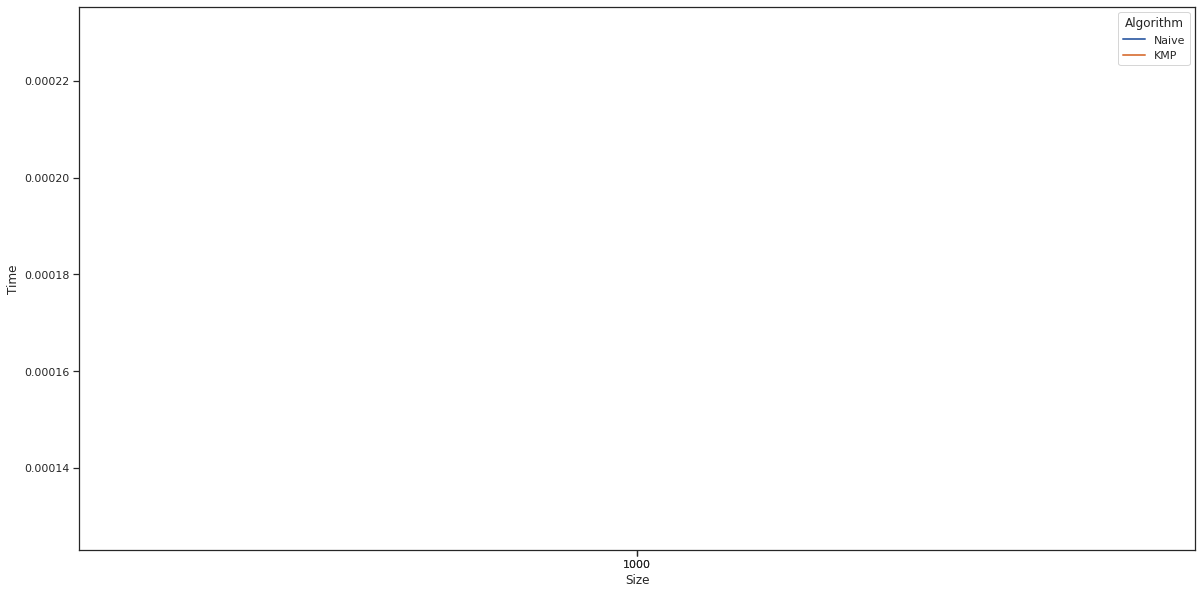

<Figure size 1440x720 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient='index', columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

#Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

#Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

chart = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)

#plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()